In [124]:
import json
import matplotlib.pyplot as plt
import pandas as pd
color_df = pd.read_json('../data/spiritedaway/imageSceneData.json')
color_df.head()

,colors,sceneNum,second
0,"[[131, 119, 88], [57, 54, 45], [183, 171, 162]]",0,249
1,"[[26, 24, 29], [157, 159, 146], [90, 94, 87], ...",0,261
2,"[[174, 33, 43], [176, 248, 68], [62, 23, 28], ...",0,507
3,"[[29, 21, 18], [108, 108, 112]]",0,513
4,"[[224, 189, 150], [44, 35, 30], [144, 124, 111]]",0,275


(747, 4, 3)
(4, 747, 3)


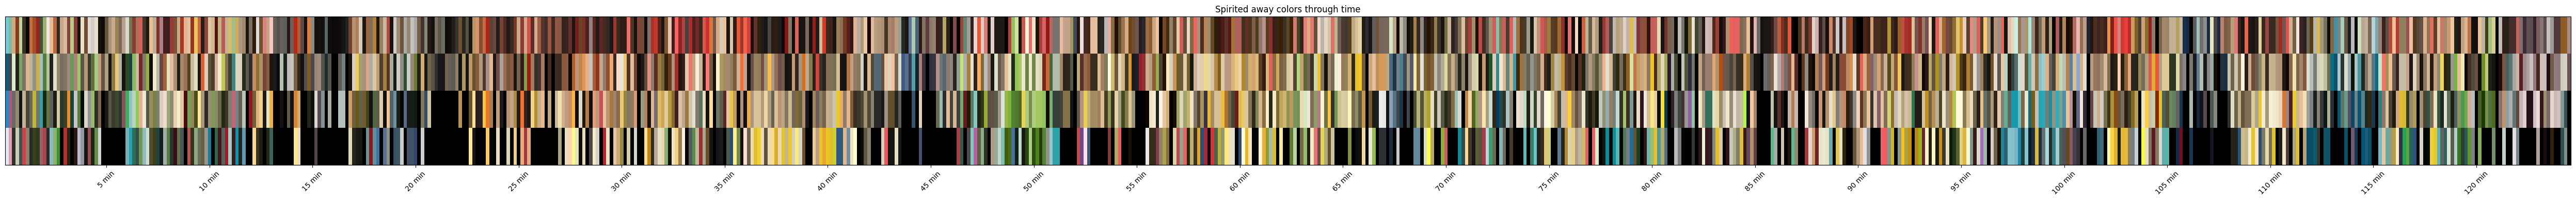

747


In [125]:
import ast
import numpy as np
import colorsys
if isinstance(color_df["colors"].iloc[0], str):
    color_df["colors"] = color_df["colors"].apply(ast.literal_eval)
def sort_by_hsl(colors):
    def rgb_to_hsl(c):
        r, g, b = [x / 255.0 for x in c]
        h, l, s = colorsys.rgb_to_hls(r, g, b) 
        return (h, l, s)
    return sorted(colors, key=rgb_to_hsl)

def normalize_colors(c):
    if c is None:
        return np.zeros((4, 3))
    if isinstance(c, (float, int)):
        return np.zeros((4, 3))
    if isinstance(c, list) and len(c) == 3 and all(isinstance(x, (int, float)) for x in c):
        c = [c]
    if isinstance(c, list) and len(c) > 0 and isinstance(c[0], (list, tuple)):
        c = sort_by_hsl(c)
    else:
        return np.zeros((4, 3)) 
 
    c = sort_by_hsl(c)
    while len(c) < 4:
        c.append([0,0,0])
    if len(c)>0:
        c = c[:4] 
    return np.array(c)/ 255.0
    
color_df["colors"] = color_df["colors"].apply(normalize_colors)
color_df = color_df.sort_values("second")
color_df.head()




color_list = []
color_array =np.array([np.array(c) for c in color_df['colors']])
print(color_array.shape)
# print(color_array)

arr = np.transpose(color_array, (1, 0, 2))
print(arr.shape)
fig, ax = plt.subplots(figsize=(50, 4))
ax.imshow(arr, aspect="auto")
ax.set_yticks([])
seconds = color_df["second"].to_numpy()
tick_indices = [i for i, s in enumerate(seconds) if s % 30 == 0]
tick_labels = [f"{s//6:d} min" for s in seconds[tick_indices]]
ax.set_xticks(tick_indices)
ax.set_xticklabels(tick_labels, rotation=45)
ax.set_title("Spirited away colors through time")
plt.tight_layout()
plt.show()

print(np.max(color_df['second']))

In [126]:
color_df.head()

,colors,sceneNum,second
206,"[[0.43529411764705883, 0.792156862745098, 0.85...",0,1
243,"[[0.5098039215686274, 0.7294117647058823, 0.61...",0,2
220,"[[0.8196078431372549, 0.6627450980392157, 0.49...",0,3
321,"[[0.5372549019607843, 0.23137254901960785, 0.1...",0,4
294,"[[0.7529411764705882, 0.8352941176470589, 0.6]...",0,5


In [127]:
audio_df =pd.read_json('../data/spiritedaway/audioSceneData.json')
audio_df.sort_values("seconds")
audio_df.head()

,zcr_mean,zcr_min,zcr_max,spectral_centroid_mean,spectral_centroid_min,spectral_centroid_max,spectral_spread_mean,spectral_spread_min,spectral_spread_max,mfcc_1_mean,...,chroma_10_max,chroma_11_mean,chroma_11_min,chroma_11_max,chroma_12_mean,chroma_12_min,chroma_12_max,index,seconds,amplitude_avg
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-99.001805,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0,0,0.0
1,0.043690,0.000000,0.303460,0.074734,0.000833,0.390932,0.072973,2.909873e-09,0.292235,-78.892597,...,0.118011,0.002298,1.185741e-37,0.024812,0.000641,6.267093e-36,0.004260,1,10,310.0
2,0.020729,0.003752,0.050438,0.132056,0.055632,0.230705,0.179048,1.145645e-01,0.218440,-25.845372,...,0.008120,0.063833,7.150313e-03,0.177242,0.000390,2.398530e-05,0.001496,2,20,1575.5
3,0.011333,0.002084,0.032930,0.072032,0.024524,0.135195,0.158901,6.852765e-02,0.227262,-24.710870,...,0.005919,0.036896,9.519919e-04,0.103124,0.000411,1.054703e-05,0.002284,3,30,1702.5
4,0.008632,0.002918,0.018758,0.083184,0.040471,0.142034,0.169868,9.737034e-02,0.232572,-24.749067,...,0.007057,0.035876,2.203818e-03,0.144056,0.000600,3.985973e-06,0.002420,4,40,1483.5


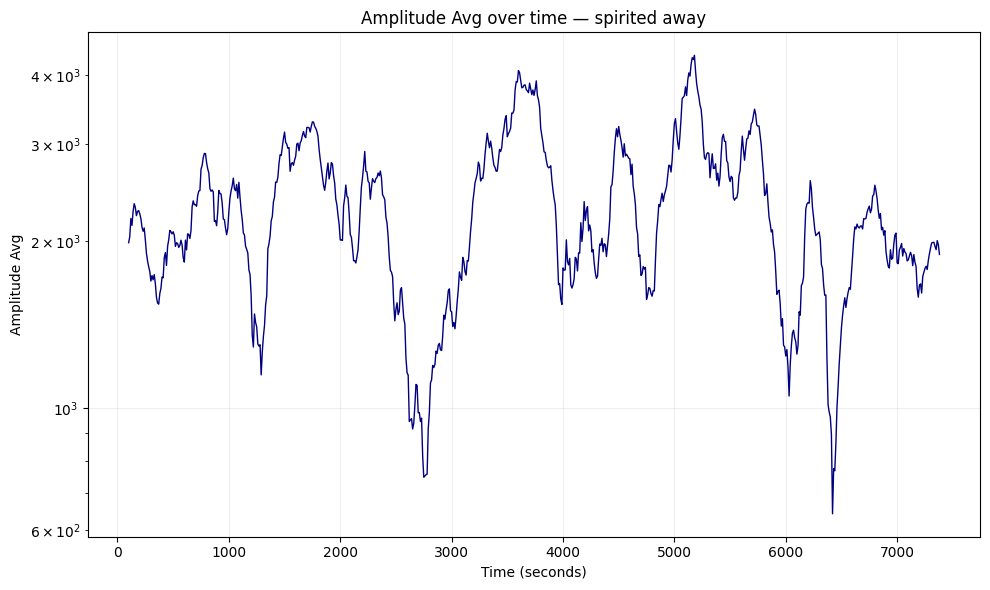

In [128]:
def plot_audio_feature(feature):
    plt.figure(figsize=(10,6))
    smoothed = audio_df[feature].rolling(window=20, center=True).mean()
    
    plt.plot(audio_df['seconds'], smoothed, color='navy', linewidth=1)
    plt.title(f"{feature.replace('_',' ').title()} over time — spirited away")
    plt.xlabel("Time (seconds)")
    plt.ylabel(feature.replace('_',' ').title())
    plt.yscale('log')
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()
    
plot_audio_feature('amplitude_avg')

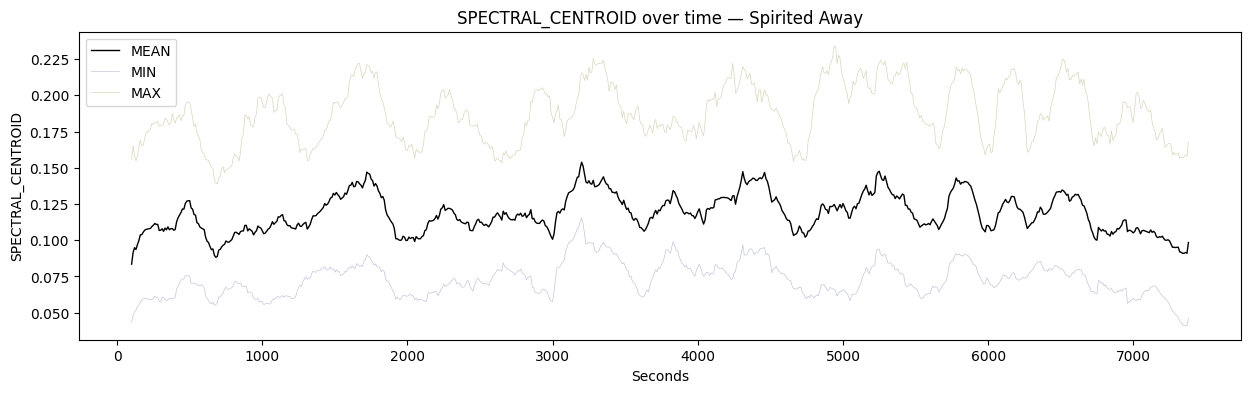

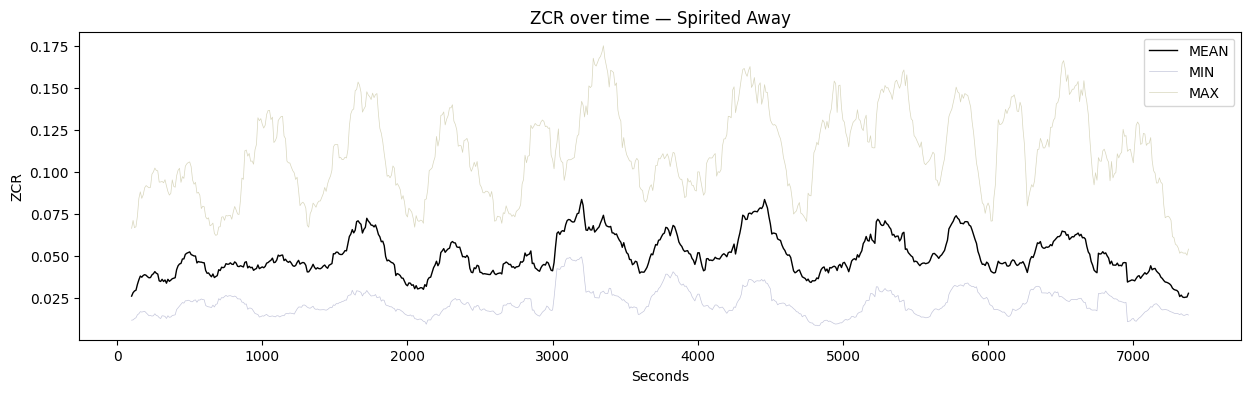

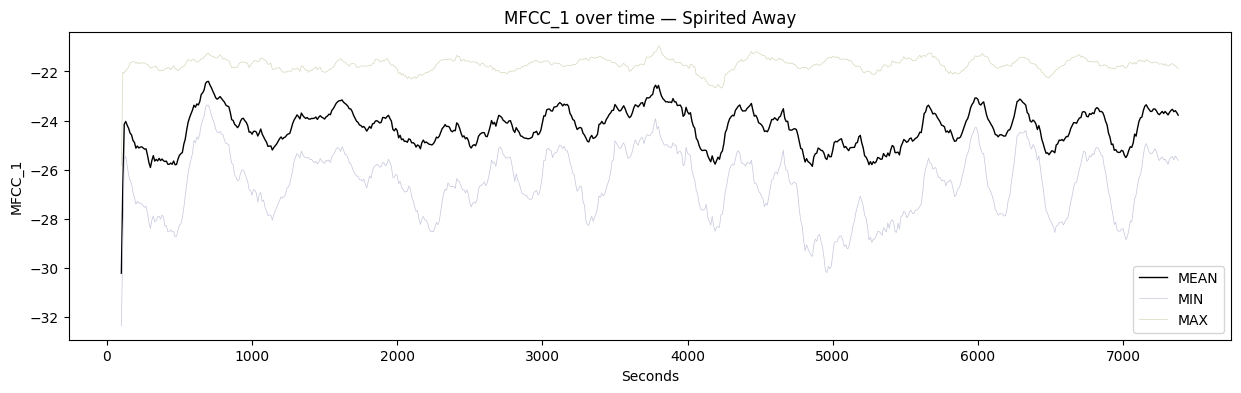

In [129]:
def plot_audio_feature_minmax(feature_prefix):
    plt.figure(figsize=(15,4))
    styles = {
        "mean": ("#000000", 1, "-"), 
        "min":  ("#c4c6db", .5, "-"), 
        "max":  ("#d8d6bc", .5, "-")  
    }

    for suffix, (color, lw, ls) in styles.items():
        col = f"{feature_prefix}_{suffix}"
        smoothed = audio_df[col].rolling(window=20, center=True).mean()
        if col in audio_df.columns:
            plt.plot(
                audio_df["seconds"], smoothed,
                label=suffix.upper(),
                color=color,
                linewidth=lw,
                linestyle=ls
            )
    plt.title(f"{feature_prefix.upper()} over time — Spirited Away")
    plt.xlabel("Seconds")
    plt.ylabel(feature_prefix.upper())
    plt.yscale("linear")
    plt.legend()
    plt.show()
plot_audio_feature_minmax('spectral_centroid')
plot_audio_feature_minmax('zcr')
plot_audio_feature_minmax('mfcc_1')
# plot_audio_feature_minmax('mfcc_2')
# plot_audio_feature_minmax('mfcc_3')
# plot_audio_feature_minmax('mfcc_5')
# plot_audio_feature_minmax('mfcc_6')
# plot_audio_feature_minmax('mfcc_7')

In [131]:
emotion_df = pd.read_csv('../data/spiritedaway/emotion_data.csv')
def time_to_seconds(t):
    parts = t.split(":")
    return int(parts[0])*3600 + int(parts[1])*60 + float(parts[2])
emotion_df['start_second'] = emotion_df['start_time'].apply(time_to_seconds)
emotion_df['end_second'] = emotion_df['end_time'].apply(time_to_seconds)
emotion_df.head()

,start_time,end_time,dialogue,sentiment,sentiment_smooth,emotions,surprise,positive,joy,anticipation,...,trust,negative,sadness,disgust,pos_score,neg_score,emotion_balance,smooth_balance,start_second,end_second
0,0:00:13.34,0:00:19.72,"Good luck, Chihiro \NHope we meet again",0.7096,0.709600,"[('surprise', 0.25), ('positive', 0.25), ('joy...",0.25,0.25,0.25,0.25,...,NaN,NaN,NaN,NaN,0.5,0.0,0.5,0.500000,13.34,19.72
1,0:00:16.10,0:00:19.10,Chihiro? Chihiro!,0.0000,0.354800,"[('fear', 0.0), ('anger', 0.0), ('anticip', 0....",0.00,0.00,0.00,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,16.10,19.10
2,0:00:19.10,0:00:20.56,We're almost there.,0.0000,0.236533,"[('fear', 0.0), ('anger', 0.0), ('anticip', 0....",0.00,0.00,0.00,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,19.10,20.56
3,0:00:23.52,0:00:25.60,This really is the middle of nowhere.,0.0000,0.177400,"[('fear', 0.0), ('anger', 0.0), ('anticip', 0....",0.00,0.00,0.00,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,23.52,25.60
4,0:00:25.60,0:00:28.57,I'll have to shop in the next town.,0.0000,0.141920,"[('fear', 0.0), ('anger', 0.0), ('anticip', 0....",0.00,0.00,0.00,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,25.60,28.57


In [135]:
import numpy as np

import pandas as pd


emotion_cols = ["sentiment", "sentiment_smooth", "joy", "fear", "anger", "anticipation", "sadness", "positive", "negative"]

def get_emotions_for_color(color_time, emotion_df, emotion_cols):
    color_time = color_time*10
    # match the overlapping
    mask = (emotion_df["start_second"] <= color_time) & (emotion_df["end_second"] >= color_time)
    matched = emotion_df.loc[mask, emotion_cols]

    if matched.empty:
        # No matching emotion → return NaNs
        return pd.Series([np.nan]*len(emotion_cols), index=emotion_cols)
    else:
        # If multiple matches, you could take the first, or the mean
        return matched.iloc[0]  


color_df[emotion_cols] = color_df["second"].apply(lambda t: get_emotions_for_color(t, emotion_df, emotion_cols))
color_df.head()

,colors,sceneNum,second,sentiment,sentiment_smooth,joy,fear,anger,anticipation,sadness,positive,negative
206,"[[0.43529411764705883, 0.792156862745098, 0.85...",0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,"[[0.5098039215686274, 0.7294117647058823, 0.61...",0,2,0.0000,0.236533,0.0,0.0,0.0,NaN,0.0,0.0,0.0
220,"[[0.8196078431372549, 0.6627450980392157, 0.49...",0,3,0.0000,0.118267,0.0,0.0,0.0,NaN,0.0,0.0,0.0
321,"[[0.5372549019607843, 0.23137254901960785, 0.1...",0,4,0.4754,0.131667,0.0,0.0,0.0,NaN,0.0,0.0,0.0
294,"[[0.7529411764705882, 0.8352941176470589, 0.6]...",0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


747


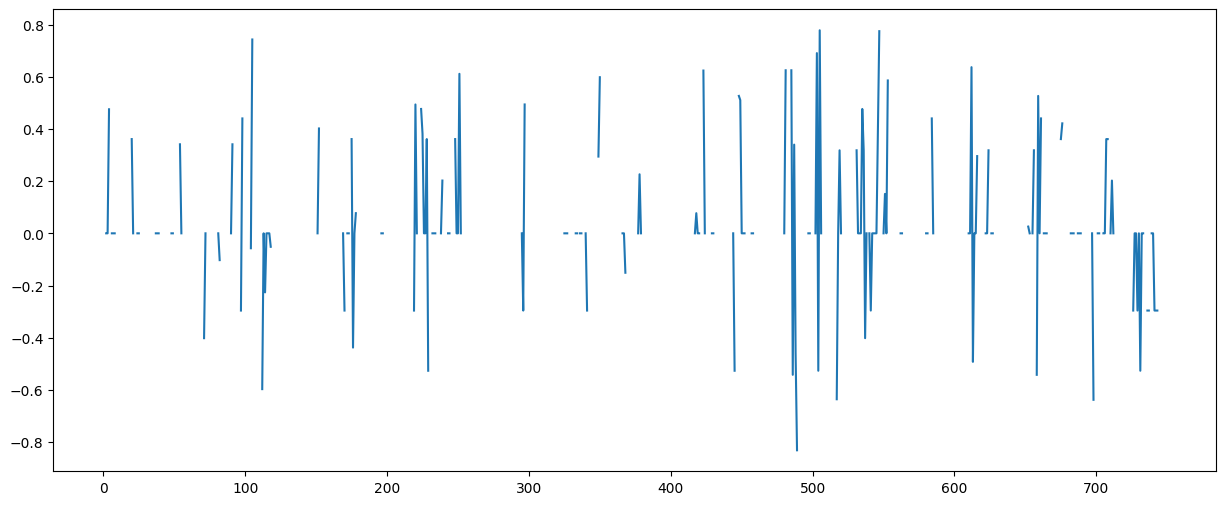

In [159]:
color_df['avg_color'] = color_df['colors'].apply(lambda c: np.mean(c, axis=0))
print(len(color_df))
colors = np.stack(color_df['avg_color'].values)
plt.figure(figsize=(15,6))
plt.plot(color_df['second'],color_df['sentiment'])

plt.show()